In [1]:
from backend.dataset_service.hyper_kvasir.dataset import HyperKvasirDataModule
import torchvision.transforms as T

# inii the dataset and the dataloader
dm = HyperKvasirDataModule(
    # provide dataset config
    img_size=128,
    batch_size=32,
    transform=[
        # T.RandomRotation(45),
    ],
    # mixed_aug_with_target=[
    #     "backend_central_dev.data_processing.mix.CutMixUp",
    #     dict(
    #         prob=1.0,
    #         use_mixup=False,
    #     )
    # ]
    mixed_aug_with_target_and_model=[
        "backend_central_dev.data_processing.mix.PuzzleMix",
        dict(
            prob=1.0,
        )
    ]
)

['/Users/yinnnyou/anaconda3/envs/computing-solution/lib/python3.11/site-packages/ipykernel_launcher.py', '--f=/Users/yinnnyou/Library/Jupyter/runtime/kernel-v3550d472fb6679b17b78fcdfd1cf3f81f63da1ec5.json']
Not in flask environment, skip the initialization, please use the 'flask --app ...' command to start the service
Applied transform for training: 
Compose(
      Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
      Lambda()
)
Applied mixed_aug_with_target_and_model for training: 
PuzzleMix(num_classes=20, config={'prob': 1.0}, saliency_model=None)
Applied transform for validating: 
Compose(
      Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
      Lambda()
)


/Users/yinnnyou/anaconda3/envs/computing-solution/lib/python3.11/site-packages/gco/__init__.py:7: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  if not hasattr(numpy, name):


In [2]:
from backend.model_service.effnetv2s.model import model_init_func, model_fine_tune_func
from backend_central_dev.model_training.lightning_model import FineTunableModel, MlxOps_LightningModel

ftm = FineTunableModel(
    model_init_func=model_init_func,
    model_fine_tune_func=model_fine_tune_func,
)

model = MlxOps_LightningModel(
    ftm, dm.num_classes,
    debug=True
)

['/Users/yinnnyou/anaconda3/envs/computing-solution/lib/python3.11/site-packages/ipykernel_launcher.py', '--f=/Users/yinnnyou/Library/Jupyter/runtime/kernel-v3550d472fb6679b17b78fcdfd1cf3f81f63da1ec5.json']
Not in flask environment, skip the initialization, please use the 'flask --app ...' command to start the service


In [8]:
import lightning as L

trainer = L.Trainer(
    precision='16-mixed',
    max_epochs=1,
    max_steps=1,
    # fast_dev_run=True,
)

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Missing logger folder: /Users/yinnnyou/workspace/computing-solution-of-ml-and-xai/lightning_logs


Dataset exist:  /Users/yinnnyou/autodl-tmp/ml_data/hyper_kvasir/labeled-images
Saliency Dataset exist:  None



  | Name    | Type             | Params
---------------------------------------------
0 | model   | EfficientNet     | 20.2 M
1 | loss_fn | CrossEntropyLoss | 0     
---------------------------------------------
20.2 M    Trainable params
0         Non-trainable params
20.2 M    Total params
80.812    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.07111992..1.0000002].


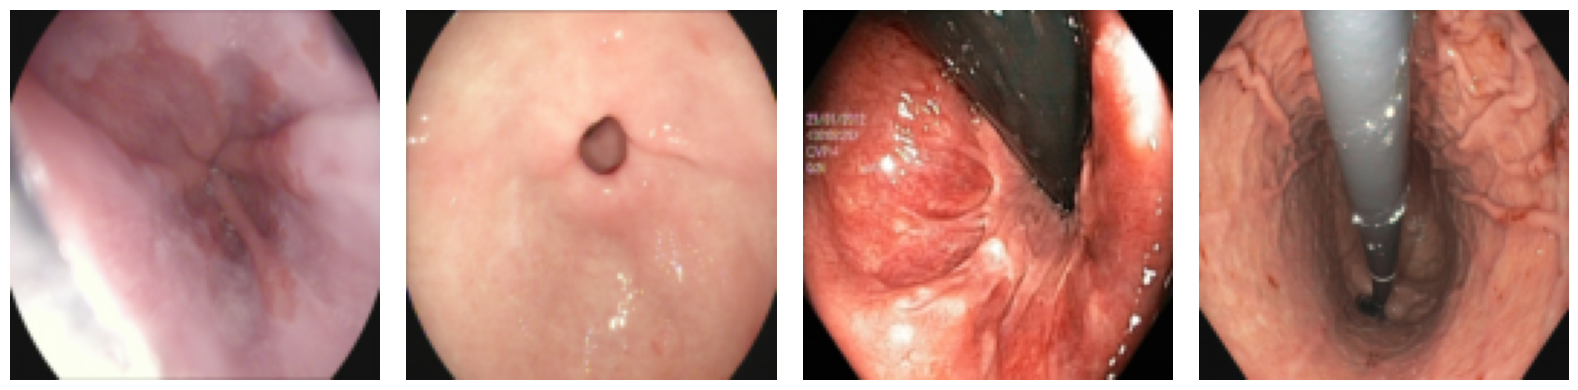

tensor([ 7, 11, 12, 13], device='mps:0')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.07111992..1.0000002].


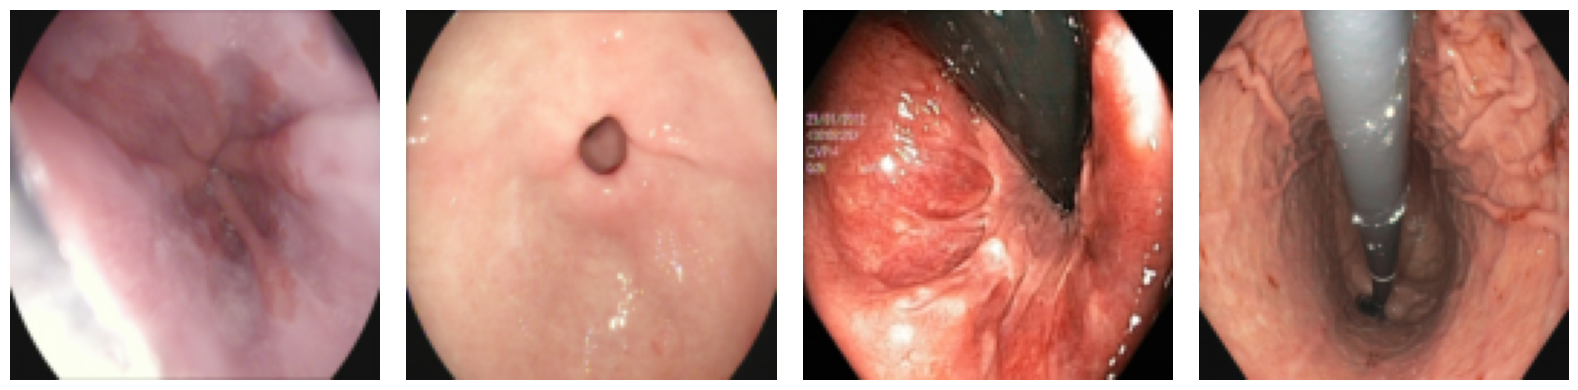

tensor([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0.]], device='mps:0')


`Trainer.fit` stopped: `max_steps=1` reached.


In [9]:
trainer.fit(model, dm)